### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time

from scipy import stats
import statsmodels.api as sm
from bioinfokit.analys import stat

### Data Collection

In [2]:
people = pd.read_csv("people.csv", index_col=0)
people.head()

,Lat,Lon
People,,
0,2.868615,101.673326
1,2.878383,101.607508
2,2.871754,101.599514
3,3.027363,101.652546
4,2.997368,101.626043


In [3]:
ppv = pd.read_csv("ppv.csv", index_col=0)
ppv.head()

,Lat,Lon
PPV,,
0,2.864831,101.694876
1,3.311896,101.585703
2,3.020707,101.650831
3,3.096667,101.706738
4,3.263520,101.470738


### Method 1

In [4]:
def nearest_ppv(df_1, df_2):
    people_lat = np.array(df_1['Lat'].tolist())
    people_lon = np.array(df_1['Lon'].tolist())
    ppv_lat = np.array(df_2['Lat'].tolist())
    ppv_lon = np.array(df_2['Lon'].tolist())
    people_lat = np.deg2rad(people_lat)
    people_lon = np.deg2rad(people_lon)
    ppv_lat = np.deg2rad(ppv_lat)
    ppv_lon = np.deg2rad(ppv_lon)
    diff_lat = people_lat[:,None] - ppv_lat[:]
    diff_lng = people_lon[:,None] - ppv_lon[:]
    d = np.sin(diff_lat/2)**2 + np.cos(people_lat[:,None])*np.cos(ppv_lat[:]) * np.sin(diff_lng/2)**2
    return 2 * 6371 * np.arcsin(np.sqrt(d))

In [5]:
execution_time = {}
for n in range(50):
    # get the start time
    st = time.time()

    people["nearest_ppv_1"] = ppv.loc[ppv.index[np.argmin(nearest_ppv(people, ppv), axis=1)]].index
    people.head()

    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    execution_time[n+1] = elapsed_time

In [6]:
df_execution_time = pd.DataFrame.from_dict(execution_time, orient='index', columns=['time_1'])
df_execution_time

,time_1
1,0.046875
2,0.042886
3,0.040921
4,0.039862
5,0.042917
6,0.039862
7,0.040891
8,0.040891
9,0.039893
10,0.041888


### Method 2

In [7]:
execution_time = {}
len_people = people.shape[0]
len_ppv = ppv.shape[0]
for n in range(50):
    people_to_ppv = []
    st = time.time()
    people_to_ppv = []
    for i in range(len_people):
        dist = []
        people_lat = people['Lat'][i]
        people_lon = people['Lon'][i]
        people_lat = np.deg2rad(people_lat)
        people_lon = np.deg2rad(people_lon)
        for j in range(len_ppv):
            ppv_lat = ppv['Lat'][j]
            ppv_lon = ppv['Lon'][j]
            ppv_lat = np.deg2rad(ppv_lat)
            ppv_lon = np.deg2rad(ppv_lon)
            diff_lat = people_lat - ppv_lat
            diff_lng = people_lon - ppv_lon
            d = np.sin(diff_lat/2)**2 + np.cos(people_lat)*np.cos(ppv_lat) * np.sin(diff_lng/2)**2
            dist.append(2 * 6371 * np.arcsin(np.sqrt(d)))
        people_to_ppv.append(np.argmin(dist))
    et = time.time()
    elapsed_time = et - st
    print(elapsed_time)
    execution_time[n+1] = elapsed_time

18.39085817337036
18.25716495513916
18.260242223739624
18.221269130706787
18.13150906562805
18.087627410888672
18.21129870414734
18.09756898880005
18.062724590301514
18.163395166397095
18.232239723205566
18.1414852142334
18.196395874023438
18.476587533950806
18.201329708099365
18.165415048599243
18.218276500701904
18.2651526927948
18.108571529388428
18.2382595539093
18.06170415878296
17.99785876274109
17.988861799240112
19.064045429229736
18.104583501815796
18.07266664505005
18.025792598724365
18.004850387573242
18.10163140296936
18.0068097114563
17.983935594558716
18.03373622894287
18.13350534439087
23.924863815307617
19.393505334854126
18.229285717010498
18.14546775817871
18.174396991729736
18.148431301116943
18.26163101196289
18.096599578857422
18.123528957366943
18.174400091171265
18.179349422454834
18.118580102920532
18.084819078445435
18.226289987564087
18.13250970840454
18.065686225891113
18.11356019973755


In [8]:
people["nearest_ppv_2"] = ppv.loc[ppv.index[np.array(people_to_ppv)]].index
people.tail()

,Lat,Lon,nearest_ppv_1,nearest_ppv_2
People,,,,
9995,2.995173,101.695038,40,40
9996,3.006136,101.693904,40,40
9997,2.970721,101.716344,58,58
9998,2.980272,101.644367,2,2
9999,2.942730,101.706985,58,58


In [9]:
df_execution_time["time_2"] = execution_time.values()
df_execution_time.head()

,time_1,time_2
1,0.046875,18.390858
2,0.042886,18.257165
3,0.040921,18.260242
4,0.039862,18.221269
5,0.042917,18.131509


### Method 3

In [10]:
from sklearn.neighbors import KDTree

In [11]:
execution_time
distances = None
indices = None
for n in range(50):
    st = time.time()
    kd = KDTree(ppv[["Lat", "Lon"]].values, metric='euclidean')
    distances, indices = kd.query(people[["Lat", "Lon"]], k = 1)
    et = time.time()
    elapsed_time = et - st
    execution_time[n+1] = elapsed_time

In [12]:
df_execution_time["time_3"] = execution_time.values()
df_execution_time.head()

,time_1,time_2,time_3
1,0.046875,18.390858,0.006981
2,0.042886,18.257165,0.005984
3,0.040921,18.260242,0.005984
4,0.039862,18.221269,0.005026
5,0.042917,18.131509,0.005988


In [13]:
n_ppv_3 = [x[0] for x in indices]
people["nearest_ppv_3"] = n_ppv_3
people.head()

,Lat,Lon,nearest_ppv_1,nearest_ppv_2,nearest_ppv_3
People,,,,,
0,2.868615,101.673326,0,0,0
1,2.878383,101.607508,44,44,44
2,2.871754,101.599514,44,44,44
3,3.027363,101.652546,2,2,2
4,2.997368,101.626043,19,19,19


In [14]:
people.to_csv('people_to_ppv.csv')

In [15]:
df_execution_time.to_csv('execution_time_1.csv') #for computer 1

In [ ]:
df_execution_time.to_csv('execution_time_2.csv') #for computer 2

### Analysis

### Task 1

In [16]:
df1 = pd.read_csv('execution_time_1.csv', index_col=0) # computer 1
df1.head()

,time_1,time_2,time_3
1,0.046875,18.390858,0.006981
2,0.042886,18.257165,0.005984
3,0.040921,18.260242,0.005984
4,0.039862,18.221269,0.005026
5,0.042917,18.131509,0.005988


In [17]:
df2 = pd.read_csv('execution_time_2.csv', index_col=0)  # computer 2
df2.head()

,time_1,time_2,time_3
1,0.035111,15.915760,0.005276
2,0.022871,16.426606,0.004638
3,0.021451,17.177436,0.004637
4,0.021151,17.746995,0.004487
5,0.020858,17.633384,0.004566


In [18]:
print(np.var(df1['time_1']), np.var(df2['time_1']))

3.621695364845446e-05 6.110410640849293e-06


In [20]:
np.var(df1['time_1'])/np.var(df2['time_1'])

5.9270899743360985

In [21]:
stats.ttest_ind(a=df1['time_1'], b=df2['time_1'], equal_var=False)

Ttest_indResult(statistic=22.44484009675042, pvalue=2.4098101499809435e-32)

The p-value obtained from t-test analysis are 2.4098101499809435e-32. Therefore, we conclude that there are significant differences among the performance of computers. The p-value is less than alpha = 0.05, we have to reject the null hypothesis of the test. We have sufficient evidence to say that the mean execution time between the two computers is different.

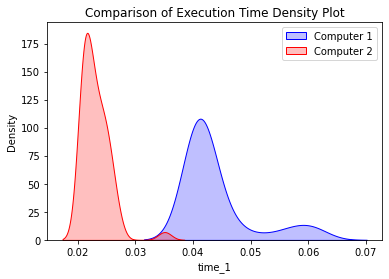

In [22]:
fig = sns.kdeplot(df1['time_1'], shade=True, color="b", label='Computer 1').set(title='Comparison of Execution Time Density Plot')
fig = sns.kdeplot(df2['time_1'], shade=True, color="r", label='Computer 2')
plt.legend()
plt.savefig('Q2_Task1.png')
plt.show()

### Task 2

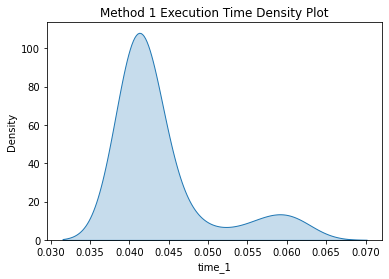

In [24]:
sns.kdeplot(df1['time_1'], shade=True).set(title='Method 1 Execution Time Density Plot')
plt.savefig('Q2_Method1.png')
plt.show()

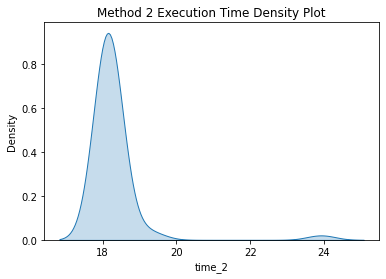

In [25]:
sns.kdeplot(df1['time_2'], shade=True).set(title='Method 2 Execution Time Density Plot')
plt.savefig('Q2_Method2.png')
plt.show()

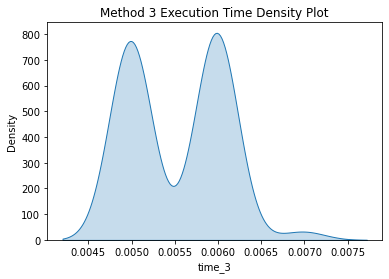

In [26]:
sns.kdeplot(df1['time_3'], shade=True).set(title='Method 3 Execution Time Density Plot')
plt.savefig('Q2_Method3.png')
plt.show()

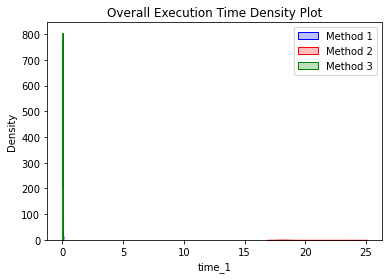

In [23]:
fig = sns.kdeplot(df1['time_1'], shade=True, color="b", label='Method 1').set(title='Overall Execution Time Density Plot')
fig = sns.kdeplot(df1['time_2'], shade=True, color="r", label='Method 2')
fig = sns.kdeplot(df1['time_3'], shade=True, color="g", label='Method 3')
plt.legend()
plt.savefig('Q2_Overall.png')
plt.show()

In [27]:
df_1 = df1['time_1']
df_2 = df1['time_2']
df_3 = df1['time_3']

In [28]:
print(np.var(df_1), np.var(df_2), np.var(df_3))

3.621695364845446e-05 0.6994999951552746 2.8571863012985666e-07


In [29]:
stats.ttest_ind(a=df_1, b=df_2, equal_var=False)

Ttest_indResult(statistic=-152.84185287941781, pvalue=2.564367957194444e-67)

In [30]:
stats.ttest_ind(a=df_1, b=df_3, equal_var=False)

Ttest_indResult(statistic=44.532707300561675, pvalue=9.141266278614192e-42)

In [31]:
stats.ttest_ind(a=df_2, b=df_3, equal_var=False)

Ttest_indResult(statistic=153.16747569163073, pvalue=2.341309940651415e-67)

The p-value obtained from t-test analysis are 2.564367957194444e-67, 9.141266278614192e-42 and 2.341309940651415e-67. Therefore, we conclude that there are significant differences among the methods. Those p-values are less than alpha = 0.05, we have to reject the null hypothesis of the test. We have sufficient evidence to say that the mean execution time between the three methods is different.